# Rock Paper Scissors: recognition of hand signs

#### We develop a model that recognizes rock-paper-scissors hand signs in images.

We load the dataset and explore some of its statistics.

In [1]:
import urllib.request
import zipfile
import os
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
url = 'https://firebasestorage.googleapis.com/v0/b/z2tma61d2a74hya815w9x621uszb3a.appspot.com/o/RPS_dataset.zip?alt=media&token=1cee210c-e0d0-4fcf-8f61-53965a3d0d4a'
local_zip = 'RPS_dataset.zip'
urllib.request.urlretrieve(url, local_zip)
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [3]:
TRAINING_DIR = 'rps-train-set'
TESTING_DIR = 'rps-test-set'

In [4]:
training_examples = []

for folder in os.listdir(TRAINING_DIR):
    if os.path.isdir('{}/{}'.format(TRAINING_DIR,folder)):
        length = len(os.listdir('{}/{}'.format(TRAINING_DIR,folder)))
        print('{}:{}'.format(folder, length))
        training_examples.append('{}/{}/{}'.format(TRAINING_DIR,folder,os.listdir('{}/{}'.format(TRAINING_DIR,folder))[0]))

paper:840
rock:840
scissors:840


Here we show some training examples.

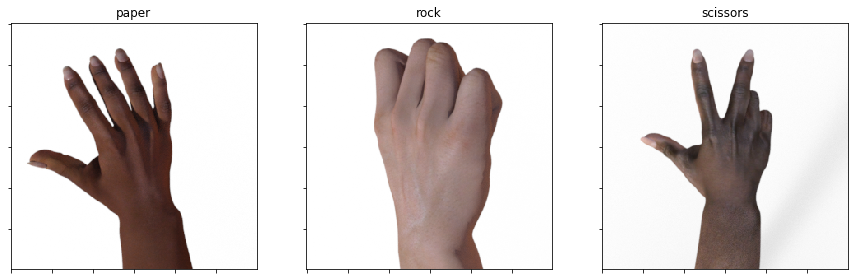

In [5]:
fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(1, 3, 1)
ax1.set_title(training_examples[0].split('/')[1])
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.imshow(plt.imread(training_examples[0]))

ax2 = fig.add_subplot(1, 3, 2)
ax2.set_title(training_examples[1].split('/')[1])
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.imshow(plt.imread(training_examples[1]))

ax3 = fig.add_subplot(1, 3, 3)
ax3.set_title(training_examples[2].split('/')[1])
ax3.set_xticklabels([])
ax3.set_yticklabels([])
ax3.imshow(plt.imread(training_examples[2]))

In [6]:
testing_examples = []

for folder in os.listdir(TESTING_DIR):
    if os.path.isdir('{}/{}'.format(TESTING_DIR,folder)):
        length = len(os.listdir('{}/{}'.format(TESTING_DIR,folder)))
        print('{}:{}'.format(folder, length))
        testing_examples.append('{}/{}/{}'.format(TESTING_DIR,folder,os.listdir('{}/{}'.format(TESTING_DIR,folder))[0]))

paper:124
rock:124
scissors:124


Here we show some testing examples.

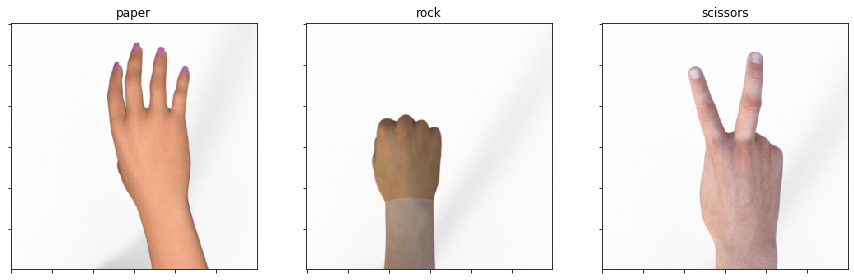

In [7]:
fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(1, 3, 1)
ax1.set_title(testing_examples[0].split('/')[1])
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.imshow(plt.imread(testing_examples[0]))

ax2 = fig.add_subplot(1, 3, 2)
ax2.set_title(testing_examples[1].split('/')[1])
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.imshow(plt.imread(testing_examples[1]))

ax3 = fig.add_subplot(1, 3, 3)
ax3.set_title(testing_examples[2].split('/')[1])
ax3.set_xticklabels([])
ax3.set_yticklabels([])
ax3.imshow(plt.imread(testing_examples[2]))

The dataset is well balanced in each class so we procede to the other steps in preparation for training a model.

-----

Here we define some hyperparameters and we construct the datasets generators for training and testing.

In [8]:
input_shape = (150,150,3)
output_shape = 3

In [9]:
training_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=40,
                                                                   width_shift_range=0.2,
                                                                   height_shift_range=0.2,
                                                                   shear_range=0.2,
                                                                   zoom_range=0.2,
                                                                   fill_mode='nearest',
                                                                   horizontal_flip=True)
training_generator = training_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                          target_size=input_shape[:-1],
                                                          batch_size=128,
                                                          class_mode='categorical')

testing_datagen = tf.keras.preprocessing.image.ImageDataGenerator()
testing_generator = testing_datagen.flow_from_directory(directory=TESTING_DIR,
                                                        target_size=input_shape[:-1],
                                                        batch_size=32,
                                                        class_mode='categorical')

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


-----

This function shows the training history of the model to see how is performing in every step.

In [10]:
def plot_training(model):
    loss = model.history.history['loss']
    val_loss = model.history.history['val_loss']
    accuracy = model.history.history['categorical_accuracy']
    val_accuracy = model.history.history['val_categorical_accuracy']
    fig = plt.figure(figsize=(10, 10))
    ax1 = fig.add_subplot(2, 1, 1)
    ax1.set_title('LOSS')
    ax1.set_xlabel('iterations')
    ax1.set_ylabel('loss')
    ax1.plot(loss, marker='.', color='#FF00AE', markersize=1, linestyle='-', label='train')
    ax1.plot(val_loss, marker='.', color='#0F00FF', markersize=1, linestyle='-', label='val')
    ax1.legend()
    ax2 = fig.add_subplot(2, 1, 2)
    ax2.set_title('ACCURACY')
    ax2.set_xlabel('iterations')
    ax2.set_ylabel('accuracy')
    ax2.plot(accuracy, marker='.', color='#FF00AE', markersize=1, linestyle='-', label='train')
    ax2.plot(val_accuracy, marker='.', color='#0F00FF', markersize=1, linestyle='-', label='val')
    ax2.legend()

-----

Here we train our first model and evaluate its performance.

In [11]:
def Model_1():
    model = tf.keras.Sequential([   
        tf.keras.layers.Lambda(function=lambda x: (1/255.)*x,
                               input_shape=input_shape),
        tf.keras.layers.Conv2D(filters=64,
                               kernel_size=(3, 3),
                               strides=(1, 1),
                               padding='valid',
                               activation='relu',
                               kernel_initializer='glorot_uniform',
                               bias_initializer='zeros'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2),
                                     strides=(2, 2),
                                     padding='valid'),
        tf.keras.layers.Conv2D(filters=64,
                               kernel_size=(3, 3),
                               strides=(1, 1),
                               padding='valid',
                               activation='relu',
                               kernel_initializer='glorot_uniform',
                               bias_initializer='zeros'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2),
                                     strides=(2, 2),
                                     padding='valid'),
        tf.keras.layers.Conv2D(filters=128,
                               kernel_size=(3, 3),
                               strides=(1, 1),
                               padding='valid',
                               activation='relu',
                               kernel_initializer='glorot_uniform',
                               bias_initializer='zeros'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2),
                                     strides=(2, 2),
                                     padding='valid'),
        tf.keras.layers.Conv2D(filters=128,
                               kernel_size=(3, 3),
                               strides=(1, 1),
                               padding='valid',
                               activation='relu',
                               kernel_initializer='glorot_uniform',
                               bias_initializer='zeros'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2),
                                     strides=(2, 2),
                                     padding='valid'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(units=64,
                              activation='relu',
                              kernel_initializer='glorot_uniform',
                              bias_initializer='zeros'),
        tf.keras.layers.Dense(units=output_shape, 
                              activation='softmax',
                              kernel_initializer='glorot_uniform',
                              bias_initializer='zeros')
    ])
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
    callback1 = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss',
                                                     patience=10,
                                                     min_delta=0.001,
                                                     factor=0.1,
                                                     min_lr=0.0001)
    callback2 = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                                 patience=20,
                                                 min_delta=0.001)
    model.compile(loss='categorical_crossentropy', metrics=['categorical_accuracy'], optimizer=optimizer)
    model.summary()
    model.fit(training_generator, steps_per_epoch=2520//128, epochs=100, callbacks=[callback1, callback2], validation_data=testing_generator, validation_steps=372//32)
    return model

In [12]:
model_1 = Model_1()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda (Lambda)              (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0

Epoch 38/100
19/19 [==============================] - 49s 3s/step - loss: 0.0340 - categorical_accuracy: 0.9891 - val_loss: 0.0814 - val_categorical_accuracy: 0.9744
Epoch 39/100
19/19 [==============================] - 48s 3s/step - loss: 0.0422 - categorical_accuracy: 0.9854 - val_loss: 0.0559 - val_categorical_accuracy: 0.9631
Epoch 40/100
19/19 [==============================] - 49s 3s/step - loss: 0.0405 - categorical_accuracy: 0.9891 - val_loss: 0.1032 - val_categorical_accuracy: 0.9602
Epoch 41/100
19/19 [==============================] - 48s 3s/step - loss: 0.0367 - categorical_accuracy: 0.9904 - val_loss: 0.1436 - val_categorical_accuracy: 0.9517
Epoch 42/100
19/19 [==============================] - 48s 3s/step - loss: 0.0276 - categorical_accuracy: 0.9916 - val_loss: 0.0561 - val_categorical_accuracy: 0.9659
Epoch 43/100
19/19 [==============================] - 48s 3s/step - loss: 0.0449 - categorical_accuracy: 0.9824 - val_loss: 0.0395 - val_categorical_accuracy: 0.9830
Epoc

19/19 [==============================] - 50s 3s/step - loss: 0.0105 - categorical_accuracy: 0.9958 - val_loss: 0.1267 - val_categorical_accuracy: 0.9602
Epoch 88/100
19/19 [==============================] - 49s 3s/step - loss: 0.0244 - categorical_accuracy: 0.9925 - val_loss: 0.0868 - val_categorical_accuracy: 0.9688
Epoch 89/100
19/19 [==============================] - 49s 3s/step - loss: 0.0139 - categorical_accuracy: 0.9954 - val_loss: 0.1066 - val_categorical_accuracy: 0.9631
Epoch 90/100
19/19 [==============================] - 48s 3s/step - loss: 0.0153 - categorical_accuracy: 0.9941 - val_loss: 0.1087 - val_categorical_accuracy: 0.9602
Epoch 91/100
19/19 [==============================] - 48s 3s/step - loss: 0.0113 - categorical_accuracy: 0.9962 - val_loss: 0.1702 - val_categorical_accuracy: 0.9517
Epoch 92/100
19/19 [==============================] - 49s 3s/step - loss: 0.0154 - categorical_accuracy: 0.9962 - val_loss: 0.1204 - val_categorical_accuracy: 0.9602
Epoch 93/100
19/1

In [13]:
model_1.evaluate(training_generator, steps=2520//128)

19/19 [==============================] - 24s 1s/step - loss: 0.0054 - categorical_accuracy: 0.9988


[0.0054047646515659594, 0.9987664]

In [14]:
model_1.evaluate(testing_generator, steps=372//32)

11/11 [==============================] - 2s 173ms/step - loss: 0.1404 - categorical_accuracy: 0.9545


[0.14042019346115095, 0.95454544]

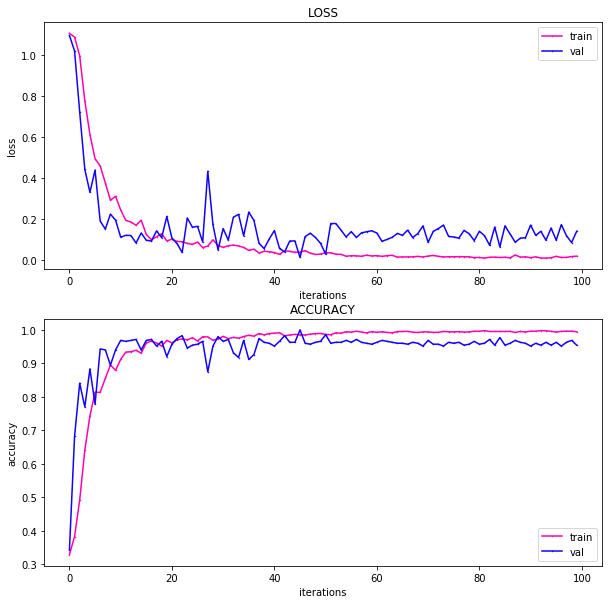

In [15]:
plot_training(model_1)

We see that this model is performing quite well but it is a bit overfitting so we keep trying with other architectures.

-----

Here we train our second model and evaluate its performance.

In [16]:
def Model_2():
    model = tf.keras.Sequential([ 
        tf.keras.layers.Lambda(function=lambda x: (1/255.)*x,
                               input_shape=input_shape),
        tf.keras.layers.Conv2D(filters=64,
                               kernel_size=(3, 3),
                               strides=(1, 1),
                               padding='valid',
                               activation='relu',
                               kernel_initializer='glorot_uniform',
                               bias_initializer='zeros'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2),
                                     strides=(2, 2),
                                     padding='valid'),
        tf.keras.layers.Conv2D(filters=64,
                               kernel_size=(3, 3),
                               strides=(1, 1),
                               padding='valid',
                               activation='relu',
                               kernel_initializer='glorot_uniform',
                               bias_initializer='zeros'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2),
                                     strides=(2, 2),
                                     padding='valid'),
        tf.keras.layers.Conv2D(filters=64,
                               kernel_size=(3, 3),
                               strides=(1, 1),
                               padding='valid',
                               activation='relu',
                               kernel_initializer='glorot_uniform',
                               bias_initializer='zeros'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2),
                                     strides=(2, 2),
                                     padding='valid'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(units=32,
                              activation='relu',
                              kernel_initializer='glorot_uniform',
                              bias_initializer='zeros'),
        tf.keras.layers.Dense(units=output_shape, 
                              activation='softmax',
                              kernel_initializer='glorot_uniform',
                              bias_initializer='zeros')
    ])
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
    callback1 = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss',
                                                     patience=10,
                                                     min_delta=0.001,
                                                     factor=0.1,
                                                     min_lr=0.0001)
    callback2 = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                                 patience=20,
                                                 min_delta=0.001)
    model.compile(loss='categorical_crossentropy', metrics=['categorical_accuracy'], optimizer=optimizer)
    model.summary()
    model.fit(training_generator, steps_per_epoch=2520//128, epochs=100, callbacks=[callback1, callback2], validation_data=testing_generator, validation_steps=372//32)
    return model

In [17]:
model_2 = Model_2()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 64)       

19/19 [==============================] - 43s 2s/step - loss: 0.1806 - categorical_accuracy: 0.9415 - val_loss: 0.3174 - val_categorical_accuracy: 0.8778
Epoch 40/100
19/19 [==============================] - 43s 2s/step - loss: 0.1337 - categorical_accuracy: 0.9544 - val_loss: 0.5203 - val_categorical_accuracy: 0.8409
Epoch 41/100
19/19 [==============================] - 43s 2s/step - loss: 0.1384 - categorical_accuracy: 0.9519 - val_loss: 0.2200 - val_categorical_accuracy: 0.8977
Epoch 42/100
19/19 [==============================] - 44s 2s/step - loss: 0.1321 - categorical_accuracy: 0.9586 - val_loss: 0.0999 - val_categorical_accuracy: 0.9489
Epoch 43/100
19/19 [==============================] - 44s 2s/step - loss: 0.1613 - categorical_accuracy: 0.9490 - val_loss: 0.1915 - val_categorical_accuracy: 0.9062
Epoch 44/100
19/19 [==============================] - 46s 2s/step - loss: 0.1375 - categorical_accuracy: 0.9586 - val_loss: 0.3152 - val_categorical_accuracy: 0.8892
Epoch 45/100
19/1

19/19 [==============================] - 56s 3s/step - loss: 0.0474 - categorical_accuracy: 0.9811 - val_loss: 0.4025 - val_categorical_accuracy: 0.8892
Epoch 89/100
19/19 [==============================] - 44s 2s/step - loss: 0.0538 - categorical_accuracy: 0.9824 - val_loss: 0.4511 - val_categorical_accuracy: 0.8864
Epoch 90/100
19/19 [==============================] - 44s 2s/step - loss: 0.0571 - categorical_accuracy: 0.9829 - val_loss: 0.3705 - val_categorical_accuracy: 0.8949
Epoch 91/100
19/19 [==============================] - 44s 2s/step - loss: 0.0444 - categorical_accuracy: 0.9841 - val_loss: 0.4437 - val_categorical_accuracy: 0.8864
Epoch 92/100
19/19 [==============================] - 43s 2s/step - loss: 0.0478 - categorical_accuracy: 0.9849 - val_loss: 0.3924 - val_categorical_accuracy: 0.8949
Epoch 93/100
19/19 [==============================] - 43s 2s/step - loss: 0.0416 - categorical_accuracy: 0.9845 - val_loss: 0.2320 - val_categorical_accuracy: 0.9119
Epoch 94/100
19/1

In [18]:
model_2.evaluate(training_generator, steps=2520//128)

19/19 [==============================] - 24s 1s/step - loss: 0.0387 - categorical_accuracy: 0.9877


[0.038743097874286925, 0.98766446]

In [19]:
model_2.evaluate(testing_generator, steps=372//32)

11/11 [==============================] - 2s 167ms/step - loss: 0.3223 - categorical_accuracy: 0.8977


[0.322335647165098, 0.89772725]

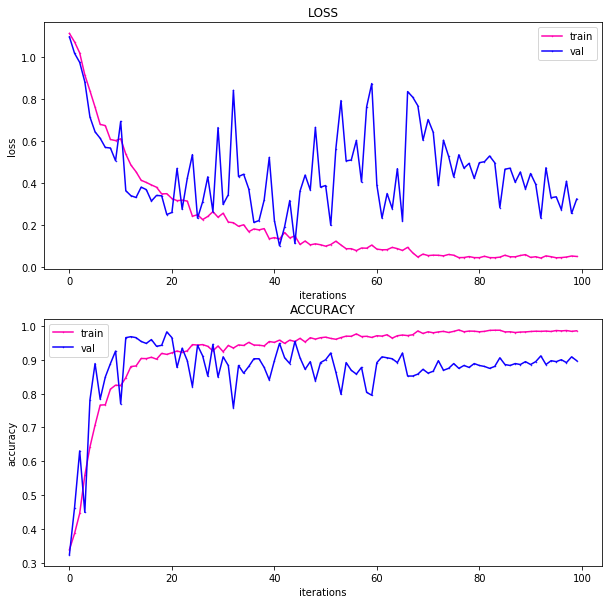

In [20]:
plot_training(model_2)

This model is performing worse than the last one. We discard it and keep trying with other architectures.

-----

Here we train our third model. We will use transfer learning in an attempt to enhance performance.

In [21]:
inception_v3 = tf.keras.applications.inception_v3.InceptionV3(include_top=False,
                                                              weights='imagenet',
                                                              input_shape=input_shape)

In [22]:
for layer in inception_v3.layers:
    layer.trainable = False

In [23]:
def Model_3():
    model = tf.keras.Sequential([  
        tf.keras.layers.Lambda(function=lambda x: (2/255.)*x-1,
                               input_shape=input_shape),
        inception_v3,
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(rate=0.5),
        tf.keras.layers.Dense(units=output_shape, 
                              activation='softmax',
                              kernel_initializer='glorot_uniform',
                              bias_initializer='zeros')   
    ])
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
    callback1 = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss',
                                                     patience=10,
                                                     min_delta=0.001,
                                                     factor=0.1,
                                                     min_lr=0.0001)
    callback2 = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                                 patience=20,
                                                 min_delta=0.001)
    model.compile(loss='categorical_crossentropy', metrics=['categorical_accuracy'], optimizer=optimizer)
    model.summary()
    model.fit(training_generator, steps_per_epoch=2520//128, epochs=100, callbacks=[callback1, callback2], validation_data=testing_generator, validation_steps=372//32)
    return model

In [24]:
model_3 = Model_3()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_2 (Lambda)            (None, 150, 150, 3)       0         
_________________________________________________________________
inception_v3 (Model)         (None, 3, 3, 2048)        21802784  
_________________________________________________________________
flatten_2 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 18432)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 55299     
Total params: 21,858,083
Trainable params: 55,299
Non-trainable params: 21,802,784
_________________________________________________________________
Train for 19 steps, validate for 11 steps
Epoch 1/100
19/19 [==============================] - 48s 3s/s

Epoch 44/100
19/19 [==============================] - 40s 2s/step - loss: 0.1431 - categorical_accuracy: 0.9620 - val_loss: 1.7016 - val_categorical_accuracy: 0.6989
Epoch 45/100
19/19 [==============================] - 41s 2s/step - loss: 0.1415 - categorical_accuracy: 0.9597 - val_loss: 2.0292 - val_categorical_accuracy: 0.6733
Epoch 46/100
19/19 [==============================] - 40s 2s/step - loss: 0.1609 - categorical_accuracy: 0.9498 - val_loss: 4.1366 - val_categorical_accuracy: 0.6534
Epoch 47/100
19/19 [==============================] - 40s 2s/step - loss: 0.1940 - categorical_accuracy: 0.9411 - val_loss: 3.4483 - val_categorical_accuracy: 0.5881
Epoch 48/100
19/19 [==============================] - 40s 2s/step - loss: 0.1580 - categorical_accuracy: 0.9519 - val_loss: 4.2150 - val_categorical_accuracy: 0.6562
Epoch 49/100
19/19 [==============================] - 40s 2s/step - loss: 0.2019 - categorical_accuracy: 0.9427 - val_loss: 5.8339 - val_categorical_accuracy: 0.6278
Epoc

19/19 [==============================] - 42s 2s/step - loss: 0.1015 - categorical_accuracy: 0.9666 - val_loss: 3.6552 - val_categorical_accuracy: 0.6506


In [25]:
model_3.evaluate(training_generator, steps=2520//128)

19/19 [==============================] - 33s 2s/step - loss: 2.9884 - categorical_accuracy: 0.7163


[2.988448751600165, 0.7162829]

In [26]:
model_3.evaluate(testing_generator, steps=372//32)

11/11 [==============================] - 4s 319ms/step - loss: 3.6552 - categorical_accuracy: 0.6506


[3.655158844861117, 0.6505682]

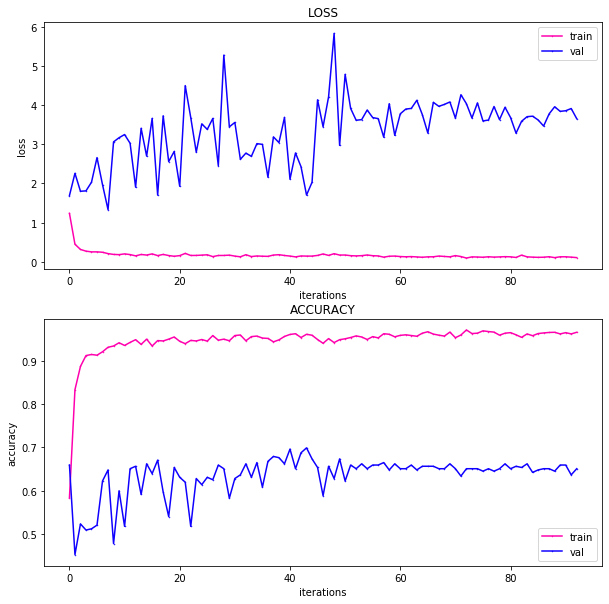

In [27]:
plot_training(model_3)

This model performance is the worst so we discard it.

#### We see that the first model is the best one. Some overfitting is present but it could be considered negligible. Additional exploration of hyperparameters would be necessary to make a final conclusion. 